In [9]:
from my_functions import*

In [10]:
file= uproot.open("/home/ruben/Escritorio/BachelorThesisRuben/Data/Muon_trees.root") #opening the Root file with Uproot 

In [ ]:
MuonTree_ZeroBias=file["MuonTree_ZeroBias;1"]
MuonTree_Zmumu=file["MuonTree_Zmumu;1"]

#Select range of events
nmin=200
nmax=1000

#Select quality 0 Z->mumu
Zmumu_pt=quality_selector(MuonTree_Zmumu["muon_quality"].array(),MuonTree_Zmumu["muon_pt"].array(),0)[nmin:nmax]
Zmumu_eta=quality_selector(MuonTree_Zmumu["muon_quality"].array(),MuonTree_Zmumu["muon_eta"].array(),0)[nmin:nmax]
Zmumu_phi=quality_selector(MuonTree_Zmumu["muon_quality"].array(),MuonTree_Zmumu["muon_phi"].array(),0)[nmin:nmax]
#And select the Z peak pairs
Zmumu_pt, Zmumu_eta, Zmumu_phi = get_all_Z_peak_pairs(Zmumu_pt,Zmumu_eta,Zmumu_phi)
#Select the ZeroBias data with energy cut
ZeroBias_eta=energy_cut(MuonTree_ZeroBias["muon_pt"].array(), MuonTree_ZeroBias["muon_eta"].array())[nmin:nmax]
ZeroBias_phi=energy_cut(MuonTree_ZeroBias["muon_pt"].array(), MuonTree_ZeroBias["muon_phi"].array())[nmin:nmax]
ZeroBias_pt=energy_cut(MuonTree_ZeroBias["muon_pt"].array(), MuonTree_ZeroBias["muon_pt"].array())[nmin:nmax]

100%|██████████| 1000/1000 [00:01<00:00, 655.21it/s]


energy_cut: Only 5.79% of the events have survived the cut with a lower cut of 14000 and no upper cut
energy_cut: Only 5.79% of the events have survived the cut with a lower cut of 14000 and no upper cut
energy_cut: Only 5.79% of the events have survived the cut with a lower cut of 14000 and no upper cut


In [12]:
Zmumu_pt

<Array [[3.03e+04, 2.67e+04], ..., [4.88e+04, ...]] type='1000 * var * float64'>

In [13]:
#Computo isolations
dr_min=0.09
dr_max=0.3
res1=muon_isolation_all_events(MuonTree_Zmumu, Zmumu_eta, Zmumu_phi, dr_min, dr_max, event_range=[nmin, nmax], batch_size=int((nmax-nmin)/10))
res2=muon_isolation_all_events(MuonTree_ZeroBias, ZeroBias_eta, ZeroBias_phi, dr_min, dr_max, [nmin, nmax], int((nmax-nmin)/10))

Expected number of events: 800
Computed isolation for 800 events


Expected number of events: 800
Computed isolation for 600 events


In [14]:
len(res1)

800

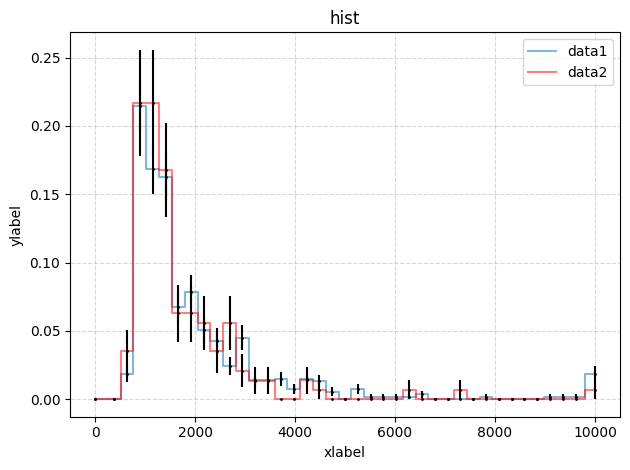

In [15]:
coolplot([res1, res2], np.linspace(0,10**4,40))

In [16]:
r1=ak.flatten(res1)/ak.flatten(Zmumu_pt)
r2=ak.flatten(res2)/ak.flatten(ZeroBias_pt)
coolplot([r1, r2], np.linspace(0,0.5,40))

ValueError: cannot broadcast RegularArray of size 1600 with RegularArray of size 2000 in divide